PARTIE ANALYSE

In [10]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [11]:
#recupération de la variable 

df_clean = pd.read_pickle('df_clean.pkl')

df_clean


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Distribution empirique des variables

Nous commençons par analyser les variables qualitatives:
dans notre cas, il s'agit du sexe, le critère fumeur et la region.

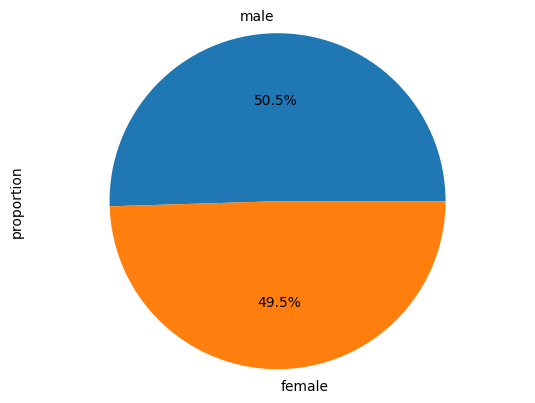

In [18]:
#sexe

df_clean['sex'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

La population est plutôt equitablement repartie 

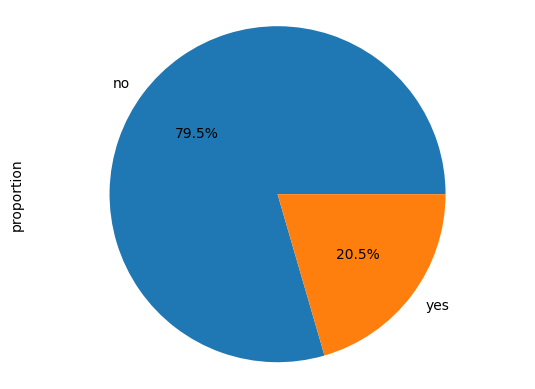

In [19]:
#smoker
df_clean['smoker'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

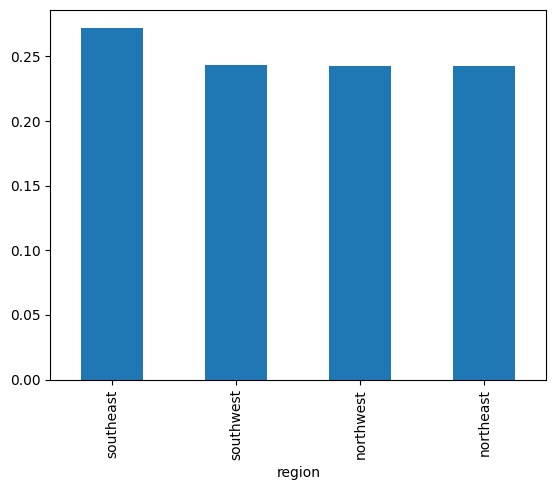

In [25]:
#region

df_clean["region"].value_counts(normalize=True).plot(kind='bar')
plt.show()

